In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.inspection import permutation_importance

from joblib import dump, load

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

### 19년도

In [72]:
df = pd.read_csv('./data/p19v31_KMP_csv.csv', encoding='CP949')

feature = ['pid', 'p19age', 'p19gender', 'p19school', 'p19mar', 'p19job1', 'p19job2', 'p19job4', 'p19income', 'p19relig2', 'p19d27001', 'p19d27002', 'p19d27003', 'p19d27004', 'p19d11002', 'p19d11004', 'p19d11006']

df_19 = df[feature].copy()

df_19.rename(
    columns={
        'p19age': 'age', 
        'p19gender': 'gender', 
        'p19school': 'school', 
        'p19mar': 'mar', 
        'p19job1': 'job', 
        'p19job2': 'job_o',
        'p19job4': 'job_x',
        'p19income': 'income', 
        'p19relig2': 'relig',
        'p19d27001': 'd01', 
        'p19d27002': 'd02', 
        'p19d27003': 'd03', 
        'p19d27004': 'd04',
        'p19d11002': 'label_1',
        'p19d11004': 'label_2', 
        'p19d11006': 'label_3'
    }, inplace=True
)

df_19['year'] = 2019

df_19.head()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_308\4244534107.py:1: DtypeWarning: Columns (4,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/p19v31_KMP_csv.csv', encoding='CP949')


,pid,age,gender,school,mar,job,job_o,job_x,income,relig,d01,d02,d03,d04,label_1,label_2,label_3,year
0,10001,6,1,5,2,1,2,,7,,4,7,7,7,15,2,23,2019
1,10002,5,2,5,2,2,,2,1,,6,6,6,6,15,2,1,2019
2,20001,6,1,5,2,1,1,,7,,6,7,7,7,16,23,,2019
3,30001,5,1,5,2,1,1,,6,,,,,,,,,2019
4,30002,5,2,4,2,2,,2,1,,,,,,,,,2019


In [73]:
df_19['label'] = (df_19[['label_1', 'label_2', 'label_3']].isin(['2']).any(axis=1).astype(int))
print(sum(df_19['label'] == 1), sum(df_19['label'] == 0))

2518 8346


In [74]:
df_19 = df_19.drop(['label_1', 'label_2', 'label_3'], axis=1)
#df_19

### 24년도

In [75]:
df = pd.read_csv('./data/p24v31_KMP_csv.csv', encoding='CP949')

feature = ['pid', 'p24age', 'p24gender', 'p24school', 'p24mar', 'p24job1', 'p24job2', 'p24job4', 'p24income', 'p24relig2', 'p24d27001', 'p24d27002', 'p24d27003', 'p24d27004', 'p24d11002', 'p24d11004', 'p24d11006', 'p24d11010', 'p24d11014']

df_24 = df[feature].copy()

df_24.rename(
    columns={
        'p24age': 'age', 
        'p24gender': 'gender', 
        'p24school': 'school', 
        'p24mar': 'mar', 
        'p24job1': 'job', 
        'p24job2': 'job_o',
        'p24job4': 'job_x',
        'p24income': 'income', 
        'p24relig2': 'relig',
        'p24d27001': 'd01', 
        'p24d27002': 'd02', 
        'p24d27003': 'd03', 
        'p24d27004': 'd04',
        'p24d11002': 'label_1',
        'p24d11004': 'label_2', 
        'p24d11006': 'label_3',
        'p24d11010': 'time_1',
        'p24d11014':'time_2'
    }, inplace=True
)

df_24['year'] = 2024

df_24.head()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_308\2916571446.py:1: DtypeWarning: Columns (5,8,9,295,296,297,298,299,300,371,372,373,374) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/p24v31_KMP_csv.csv', encoding='CP949')


,pid,age,gender,school,mar,job,job_o,job_x,income,relig,d01,d02,d03,d04,label_1,label_2,label_3,time_1,time_2,year
0,10002,6,2,5,2,2,,2,1,,11,5,4,5,16,15,2,60,60,2024
1,10003,3,2,5,1,1,1,,5,,11,4,12,3,15,16,2,60,60,2024
2,10004,3,1,5,1,1,1,,5,,3,4,3,4,2,1,15,60,60,2024
3,20001,6,1,5,1,1,1,,5,2,11,3,12,4,2,1,15,60,120,2024
4,20003,4,1,5,1,1,1,,5,,11,4,3,5,2,15,16,60,120,2024


In [76]:
df_24['label'] = (df_24[['label_1', 'label_2', 'label_3']].isin(['2']).any(axis=1).astype(int))
print(sum(df_24['label'] == 1), sum(df_24['label'] == 0))

1711 6982


In [77]:
df_24 = df_24.drop(['label_1', 'label_2', 'label_3'], axis=1)
#df_24

In [78]:
df_24['time_1'] = pd.to_numeric(df_24['time_1'], errors='coerce')
df_24['time_2'] = pd.to_numeric(df_24['time_2'], errors='coerce')

df_24['time'] = df_24['time_1'] + df_24['time_2']


# 데이터 합치기

In [79]:
df_all = pd.concat([df_19, df_24], ignore_index=True)
#df_all

In [80]:
df_all['job_o'] = df_all['job_o'].astype(str).replace({
    '1': '5',
    '2': '6',
    '3': '7',
    '4': '2',
    '9999': '8'
})

print(df_all['job_o'].value_counts())

job_o
     8467
5    8259
7    2002
2     480
6     349
Name: count, dtype: int64


In [81]:
df_all.loc[df_all['job_x'].str.strip() == '', 'job_x'] = df_all['job_o']

df_all.drop(['job', 'job_o'], axis=1, inplace=True)
df_all.rename(columns={'job_x': 'job'}, inplace=True)

### 결측치 제거

In [82]:
mask = df_all['label'].isna() | (df_all['label'].astype(str).str.strip() == '')
df_all = df_all.loc[~mask]

In [83]:
df_all['next_year_label'] = df_all.groupby('pid')['label'].shift(-1)
#df_all

In [84]:
mask = df_all['next_year_label'].isna() | (df_all['next_year_label'].astype(str).str.strip() == '')
df_all = df_all.loc[~mask]

In [85]:
print(df_all[['label', 'next_year_label']].dtypes)
print(df_all['label'].unique()[:10])
print(df_all['next_year_label'].unique()[:10])

label                int64
next_year_label    float64
dtype: object
[1 0]
[1. 0.]


In [86]:
df_all['label'] = pd.to_numeric(df_all['label'], errors='coerce').astype(int)
df_all['next_year_label'] = pd.to_numeric(df_all['next_year_label'], errors='coerce').astype(int)

In [87]:
churn_conditions = [
    (df_all['label'] == 1) & (df_all['next_year_label'].notna()) & (df_all['next_year_label'] != 1),
    (df_all['label'] == 1) & (df_all['next_year_label'].notna()) & (df_all['next_year_label'] == 1)
]
churn_choices = [1, 0]

df_all['churn'] = np.select(churn_conditions, churn_choices, default=np.nan)

print(df_all.head())
print(df_all['churn'].value_counts(dropna=False))

     pid  age  gender  school  mar job  income relig d01 d02 d03 d04  year  \
1  10002    5       2       5    2   2       1         6   6   6   6  2019   
2  20001    6       1       5    2   5       7         6   7   7   7  2019   
3  30001    5       1       5    2   5       6                        2019   
4  30002    5       2       4    2   2       1                        2019   
5  30003    2       1       4    1   1       1                        2019   

   label  time_1  time_2  time  next_year_label  churn  
1      1     NaN     NaN   NaN                1    0.0  
2      0     NaN     NaN   NaN                1    NaN  
3      0     NaN     NaN   NaN                0    NaN  
4      0     NaN     NaN   NaN                1    NaN  
5      0     NaN     NaN   NaN                0    NaN  
churn
NaN    6433
1.0    1056
0.0     656
Name: count, dtype: int64


In [88]:
df_model_base = df_all[df_all['churn'].notna()].copy()

df_model_base.drop(columns=['next_year_label'], inplace=True, errors='ignore')
df_model_base['churn'] = df_model_base['churn'].astype(int)
#print(df_model_base.isnull().sum())

In [89]:
mapping = {
    '1': 11,
    '2': 10,  
    '3': 9,  
    '4': 8,
    '5': 7,
    '6': 6,   
    '7': 5,   
    '8': 4,
    '9': 3,
    '10': 2, 
    '11': 1
}

df_model_base['d01'] = df_model_base['d01'].map(mapping).fillna(0).astype(int)
df_model_base['d02'] = df_model_base['d02'].map(mapping).fillna(0).astype(int)
df_model_base['d03'] = df_model_base['d03'].map(mapping).fillna(0).astype(int)
df_model_base['d04'] = df_model_base['d04'].map(mapping).fillna(0).astype(int)

df_model_base['relig'] = df_model_base['relig'].apply(lambda x: 0 if str(x).strip() == '' else x)
#df_model_base

In [90]:
print("이탈 예측을 위한 기본 데이터셋:")
print(df_model_base.head())
print("\n전체 이탈율:")
print(df_model_base['churn'].value_counts(normalize=True))

이탈 예측을 위한 기본 데이터셋:
       pid  age  gender  school  mar job  income relig  d01  d02  d03  d04  \
1    10002    5       2       5    2   2       1     0    6    6    6    6   
20  100001    5       1       5    2   5       6     3    4    4    4    4   
21  100002    5       2       6    2   5       6     3   11    3    3    8   
23  120001    6       1       4    2   5       5     2    6    6    6    6   
46  300002    3       2       5    1   5       4     0    8    8    8    8   

    year  label  time_1  time_2  time  churn  
1   2019      1     NaN     NaN   NaN      0  
20  2019      1     NaN     NaN   NaN      0  
21  2019      1     NaN     NaN   NaN      0  
23  2019      1     NaN     NaN   NaN      1  
46  2019      1     NaN     NaN   NaN      0  

전체 이탈율:
churn
1    0.616822
0    0.383178
Name: proportion, dtype: float64


In [91]:
df_model_base = df_model_base.drop(columns=['time_1', 'time_2', 'time'])

### 24년도 병합

In [92]:
df_24['job_o'] = df_24['job_o'].astype(str).replace({
    '1': '5',
    '2': '6',
    '3': '7',
    '4': '2',
    '9999': '8'
})

df_24.loc[df_24['job_x'].str.strip() == '', 'job_x'] = df_24['job_o']

df_24.drop(['job', 'job_o'], axis=1, inplace=True)
df_24.rename(columns={'job_x': 'job'}, inplace=True)

df_24['job'].unique()

mask = df_24['label'].isna() | (df_24['label'].astype(str).str.strip() == '')
df_24 = df_24.loc[~mask]
df_24['relig'] = df_24['relig'].replace(' ', 0)
#df_24.info()

In [93]:
df_final = pd.merge(df_model_base, df_24, on='pid', how='left')
df_final.columns

Index(['pid', 'age_x', 'gender_x', 'school_x', 'mar_x', 'job_x', 'income_x',
       'relig_x', 'd01_x', 'd02_x', 'd03_x', 'd04_x', 'year_x', 'label_x',
       'churn', 'age_y', 'gender_y', 'school_y', 'mar_y', 'job_y', 'income_y',
       'relig_y', 'd01_y', 'd02_y', 'd03_y', 'd04_y', 'time_1', 'time_2',
       'year_y', 'label_y', 'time'],
      dtype='object')

In [94]:
df_final = df_final.drop(columns=['time_1', 'time_2'])

In [95]:
series = pd.Series(df_final['time'])
description = series.describe()

q1 = description['25%']
q2 = description['50%']
q3 = description['75%']

print(f"1사분위수 (Q1): {q1}")
print(f"2사분위수 (Q2, 중앙값): {q2}")
print(f"3사분위수 (Q3): {q3}")

iqr = q3 - q1
min_q = q1 - 1.5 * iqr
max_q = q3 + 1.5 * iqr

print(f'min : {min_q}, max : {max_q}')
print(df_final['time'].max())
print(df_final['time'].min())

1사분위수 (Q1): 40.0
2사분위수 (Q2, 중앙값): 60.0
3사분위수 (Q3): 120.0
min : -80.0, max : 240.0
780.0
2.0


In [96]:
median_time = df_final['time'].median()
df_final['time'].fillna(median_time, inplace=True)
df_final = df_final.rename(columns={'time': 'time_y'})

C:\Users\Playdata\AppData\Local\Temp\ipykernel_308\739894765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['time'].fillna(median_time, inplace=True)


In [97]:
num_cols_y = ['d01_y', 'd02_y', 'd03_y', 'd04_y', 'income_y']
for col in num_cols_y:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

for col in num_cols_y:
    mask = df_final[col].isna()
    df_final.loc[mask, col] = np.random.randint(1, 4, size=mask.sum())
    
df_final = df_final.drop(['pid', 'label_x', 'label_y', 'year_x', 'year_y', 'gender_y', 'school_x', 'income_x', 'school_y', 'mar_y', 'age_y', 'relig_y', 'income_y', 'job_x', 'job_y', 'age_x'], axis=1).reset_index(drop=True)
df_final.head()

,gender_x,mar_x,relig_x,d01_x,d02_x,d03_x,d04_x,churn,d01_y,d02_y,d03_y,d04_y,time_y
0,2,2,0,6,6,6,6,0,11.0,5.0,4.0,5.0,120.0
1,1,2,3,4,4,4,4,0,6.0,7.0,7.0,7.0,240.0
2,2,2,3,11,3,3,8,0,4.0,7.0,7.0,6.0,60.0
3,1,2,2,6,6,6,6,1,3.0,6.0,5.0,5.0,60.0
4,2,1,0,8,8,8,8,0,4.0,6.0,6.0,6.0,90.0


In [98]:
X = df_final.drop(['churn'], axis=1)
y = df_final['churn']

smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X, y)

X_encoded = X_resample.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_resample, random_state=42)

param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.07],
    'max_depth': [3],
    'min_child_weight': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
    'reg_lambda': [10],
    'reg_alpha': [0],
    'gamma': [0, 1]
}

model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.07,
 'max_depth': 3,
 'min_child_weight': 0.01,
 'n_estimators': 300,
 'reg_alpha': 0,
 'reg_lambda': 10,
 'subsample': 0.8}

In [99]:
best_xgb_clf = grid_search.best_estimator_

y_pred_train = best_xgb_clf.predict(X_train)
y_prob_train = best_xgb_clf.predict_proba(X_train)[:, 1]

y_pred_test = best_xgb_clf.predict(X_test)
y_prob_test = best_xgb_clf.predict_proba(X_test)[:, 1]

print("\n===== XGBoost - Train Set Evaluation =====")
print(classification_report(y_train, y_pred_train))
print(f'{roc_auc_score(y_train, y_prob_train):.4f}')

print("\n===== XGBoost - Test Set Evaluation =====")
print(classification_report(y_test, y_pred_test))
print(f'{roc_auc_score(y_test, y_prob_test):.4f}')


===== XGBoost - Train Set Evaluation =====
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       795
           1       0.80      0.82      0.81       789

    accuracy                           0.81      1584
   macro avg       0.81      0.81      0.81      1584
weighted avg       0.81      0.81      0.81      1584

0.8990

===== XGBoost - Test Set Evaluation =====
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       261
           1       0.72      0.74      0.73       267

    accuracy                           0.72       528
   macro avg       0.72      0.72      0.72       528
weighted avg       0.72      0.72      0.72       528

0.8030


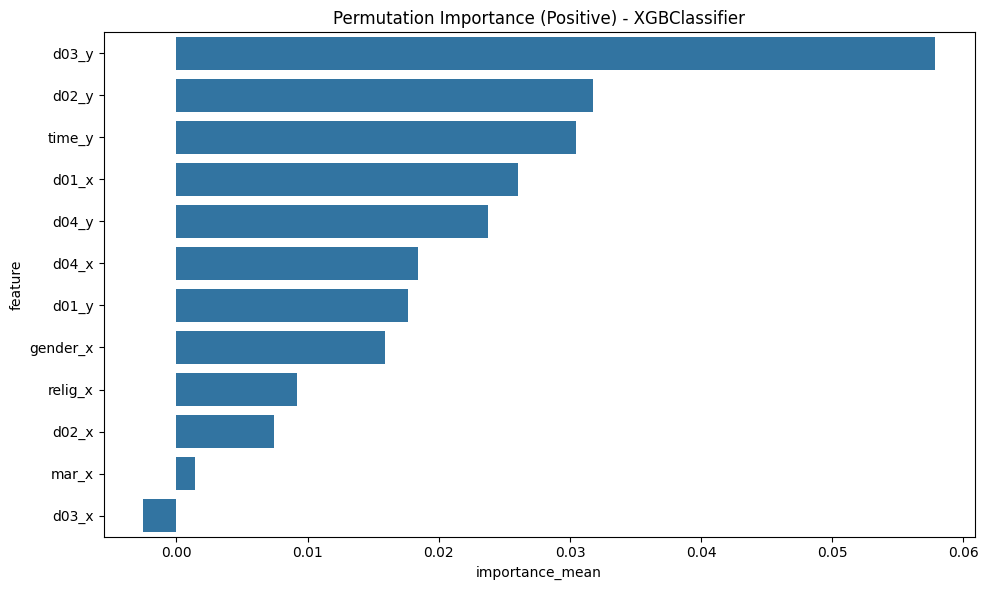

In [100]:
result = permutation_importance(best_xgb_clf, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})

importance_df = importance_df.sort_values(by='importance_mean', ascending=False)

importance_df = pd.concat([importance_df[importance_df['importance_mean'] > 0], importance_df[importance_df['importance_mean'] < 0]], ignore_index=True)

plt.figure(figsize=(10,6))
sns.barplot(x='importance_mean', y='feature', data=importance_df)
plt.title(f'Permutation Importance (Positive) - XGBClassifier')
plt.tight_layout()
plt.show()

---

모델 저장

In [101]:
dump(best_xgb_clf, 'xgb_model.joblib')

['xgb_model.joblib']

최종 모델 예측

In [102]:
import pandas as pd
from joblib import load

sample_data = {
    'gender_x': 2,
    'mar_x': 2,
    'relig_x': 0,
    'd01_x': 11,
    'd02_x': 7,
    'd03_x': 7,
    'd04_x': 7,
    'd01_y': 4,
    'd02_y': 6,
    'd03_y': 5,
    'd04_y': 6,
    'time_y': 60  
}

X_input = pd.DataFrame([sample_data])

# 모델 불러오기
loaded_model = load('xgb_model.joblib')

# 예측
y_pred = loaded_model.predict(X_input)
y_prob = loaded_model.predict_proba(X_input)

print("예측 클래스:", y_pred[0])
print("클래스별 확률:", y_prob[0])
print("1일 확률:", y_prob[0][1])

예측 클래스: 1
클래스별 확률: [0.30250758 0.6974924 ]
1일 확률: 0.6974924


In [103]:
import pandas as pd

# 예측
y_pred_test = best_xgb_clf.predict(X_test)
y_proba_test = best_xgb_clf.predict_proba(X_test)[:, 1]  # 클래스 1 확률

# 결과 DataFrame 만들기
results_df = X_test.copy()
results_df['실제값'] = y_test.values
results_df['예측값'] = y_pred_test
results_df['1_확률'] = y_proba_test

# 전체 출력
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 컬럼 출력
#print(results_df)
matched_rdf = results_df[results_df['실제값'] == results_df['예측값']]
matched_rdf.head(10)

# 필요하면 CSV로 저장 가능
# results_df.to_csv('test_predictions.csv', index=False)

,gender_x,mar_x,relig_x,d01_x,d02_x,d03_x,d04_x,d01_y,d02_y,d03_y,d04_y,time_y,실제값,예측값,1_확률
544,2,1,0,11,9,11,11,11.000000,6.0,7.0,12.0,70.000000,1,1,0.629846
1989,2,2,90,6,5,6,6,3.691714,9.0,9.0,9.0,46.541428,0,0,0.218414
527,1,1,0,11,7,7,11,11.000000,5.0,5.0,12.0,90.000000,0,0,0.405899
196,1,2,0,7,6,6,6,5.000000,7.0,6.0,7.0,40.000000,1,1,0.605812
1637,2,2,0,10,10,10,8,10.000000,12.0,3.0,3.0,120.000000,0,0,0.480583
324,2,2,130,10,9,9,5,5.000000,6.0,7.0,6.0,60.000000,1,1,0.584559
1187,1,1,0,8,5,8,8,10.000000,6.0,6.0,11.0,40.000000,0,0,0.393270
634,1,1,130,6,6,6,6,2.000000,3.0,1.0,1.0,60.000000,1,1,0.947009
997,1,2,152,6,6,6,5,3.000000,9.0,9.0,9.0,50.000000,0,0,0.234235
1054,2,1,65,9,9,9,9,1.000000,1.0,3.0,2.0,60.000000,1,1,0.981507


In [104]:
# 학습 데이터 예측
y_pred_train = best_xgb_clf.predict(X_train)
y_proba_train = best_xgb_clf.predict_proba(X_train)[:, 1]  # 클래스 1 확률

# 결과 DataFrame 만들기
train_results_df = X_train.copy()
train_results_df['실제값'] = y_train.values
train_results_df['예측값'] = y_pred_train
train_results_df['1_확률'] = y_proba_train

# 전체 출력
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#print(train_results_df)
matched_tdf = train_results_df[train_results_df['실제값'] == train_results_df['예측값']]
matched_tdf.head(10)

# CSV로 저장하고 싶으면
# train_results_df.to_csv('train_predictions.csv', index=False)


,gender_x,mar_x,relig_x,d01_x,d02_x,d03_x,d04_x,d01_y,d02_y,d03_y,d04_y,time_y,실제값,예측값,1_확률
1404,2,2,0,11,7,7,7,4.000000,6.000000,5.000000,6.000000,60.0,1,1,0.697492
1414,2,2,0,11,3,5,11,4.000000,4.000000,5.000000,5.000000,80.0,1,1,0.692461
1739,1,2,0,4,4,4,4,4.000000,5.050769,5.101537,6.000000,60.0,0,0,0.162518
1550,1,1,0,11,11,11,11,11.000000,12.000000,11.000000,11.000000,20.0,0,0,0.135363
1181,2,1,0,8,3,3,3,4.000000,4.000000,4.000000,4.000000,20.0,1,1,0.781518
1474,2,1,0,4,3,3,3,5.000000,9.000000,9.000000,9.000000,40.0,1,1,0.800863
1106,1,1,0,8,3,3,3,11.000000,7.000000,5.000000,5.000000,120.0,1,1,0.598081
1956,1,1,154,6,3,4,4,3.265938,3.531876,3.531876,4.000000,60.0,0,0,0.074583
2030,1,1,112,9,8,6,11,11.000000,6.098179,5.000000,7.803642,180.0,0,0,0.115472
1444,1,1,0,10,10,8,8,4.000000,6.000000,7.000000,6.000000,10.0,0,0,0.385494


In [105]:
print(train_results_df.shape)
print(matched_tdf.shape)

(1584, 15)
(1280, 15)


---

19-23 이탈/비이탈 컬럼 df 만들기 (예측 모델 테스트용)

In [106]:
df = pd.read_csv('./data/p23v31_KMP_csv.csv', encoding='CP949')

feature = ['pid', 'p23age', 'p23gender', 'p23school', 'p23mar', 'p23job1', 'p23job2', 'p23job4', 'p23income', 'p23relig2', 'p23d27001', 'p23d27002', 'p23d27003', 'p23d27004', 'p23d11002', 'p23d11004', 'p23d11006', 'p23d11010', 'p23d11014']

df_23 = df[feature].copy()

df_23.rename(
    columns={
        'p23age': 'age', 
        'p23gender': 'gender', 
        'p23school': 'school', 
        'p23mar': 'mar', 
        'p23job1': 'job', 
        'p23job2': 'job_o',
        'p23job4': 'job_x',
        'p23income': 'income', 
        'p23relig2': 'relig',
        'p23d27001': 'd01', 
        'p23d27002': 'd02', 
        'p23d27003': 'd03', 
        'p23d27004': 'd04',
        'p23d11002': 'label_1',
        'p23d11004': 'label_2', 
        'p23d11006': 'label_3',
        'p23d11010': 'time_1',
        'p23d11014':'time_2'
    }, inplace=True
)

df_23['year'] = 2023

#df_23.head()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_308\531561299.py:1: DtypeWarning: Columns (5,8,9,511) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/p23v31_KMP_csv.csv', encoding='CP949')


23년도 불러오고, 19년도 데이터는 앞서 전처리한거 그대로 사용

23년도 전처리 방식은 위의 24년도 전처리와 동일

In [107]:
df_23['label'] = (df_23[['label_1', 'label_2', 'label_3']].isin(['2']).any(axis=1).astype(int))
print(sum(df_23['label'] == 1), sum(df_23['label'] == 0))

2100 7657


In [108]:
df_23 = df_23.drop(['label_1', 'label_2', 'label_3'], axis=1)
#df_23

In [109]:
df_23['time_1'] = pd.to_numeric(df_23['time_1'], errors='coerce')
df_23['time_2'] = pd.to_numeric(df_23['time_2'], errors='coerce')

df_23['time'] = df_23['time_1'] + df_23['time_2']


In [110]:
df_all_2 = pd.concat([df_19, df_23], ignore_index=True)
#df_all_2

In [111]:
df_all_2['job_o'] = df_all_2['job_o'].astype(str).replace({
    '1': '5',
    '2': '6',
    '3': '7',
    '4': '2',
    '9999': '8'
})

#print(df_all_2['job_o'].value_counts())

In [112]:
df_all_2.loc[df_all_2['job_x'].str.strip() == '', 'job_x'] = df_all_2['job_o']

df_all_2.drop(['job', 'job_o'], axis=1, inplace=True)
df_all_2.rename(columns={'job_x': 'job'}, inplace=True)

In [113]:
mask = df_all_2['label'].isna() | (df_all_2['label'].astype(str).str.strip() == '')
df_all_2 = df_all_2.loc[~mask]

In [114]:
df_all_2['next_year_label'] = df_all_2.groupby('pid')['label'].shift(-1)
#df_all_2

In [115]:
mask = df_all_2['next_year_label'].isna() | (df_all_2['next_year_label'].astype(str).str.strip() == '')
df_all_2 = df_all_2.loc[~mask]

In [116]:
df_all_2['label'] = pd.to_numeric(df_all_2['label'], errors='coerce').astype(int)
df_all_2['next_year_label'] = pd.to_numeric(df_all_2['next_year_label'], errors='coerce').astype(int)

In [117]:
churn_conditions = [
    (df_all_2['label'] == 1) & (df_all_2['next_year_label'].notna()) & (df_all_2['next_year_label'] != 1),
    (df_all_2['label'] == 1) & (df_all_2['next_year_label'].notna()) & (df_all_2['next_year_label'] == 1)
]
churn_choices = [1, 0]

df_all_2['churn'] = np.select(churn_conditions, churn_choices, default=np.nan)

#print(df_all_2.head())
#print(df_all_2['churn'].value_counts(dropna=False))

In [118]:
df_model_base_2 = df_all_2[df_all_2['churn'].notna()].copy()

df_model_base_2.drop(columns=['next_year_label'], inplace=True, errors='ignore')
df_model_base_2['churn'] = df_model_base_2['churn'].astype(int)
#print(df_model_base_2.isnull().sum())

In [119]:
mapping = {
    '1': 11,
    '2': 10,  
    '3': 9,  
    '4': 8,
    '5': 7,
    '6': 6,   
    '7': 5,   
    '8': 4,
    '9': 3,
    '10': 2, 
    '11': 1
}

df_model_base_2['d01'] = df_model_base_2['d01'].map(mapping).fillna(0).astype(int)
df_model_base_2['d02'] = df_model_base_2['d02'].map(mapping).fillna(0).astype(int)
df_model_base_2['d03'] = df_model_base_2['d03'].map(mapping).fillna(0).astype(int)
df_model_base_2['d04'] = df_model_base_2['d04'].map(mapping).fillna(0).astype(int)

df_model_base_2['relig'] = df_model_base_2['relig'].apply(lambda x: 0 if str(x).strip() == '' else x)
#df_model_base_2

In [120]:
df_model_base_2 = df_model_base_2.drop(columns=['time_1', 'time_2', 'time'])

In [121]:
df_23['job_o'] = df_23['job_o'].astype(str).replace({
    '1': '5',
    '2': '6',
    '3': '7',
    '4': '2',
    '9999': '8'
})

df_23.loc[df_23['job_x'].str.strip() == '', 'job_x'] = df_23['job_o']

df_23.drop(['job', 'job_o'], axis=1, inplace=True)
df_23.rename(columns={'job_x': 'job'}, inplace=True)

df_23['job'].unique()

mask = df_23['label'].isna() | (df_23['label'].astype(str).str.strip() == '')
df_23 = df_23.loc[~mask]
df_23['relig'] = df_23['relig'].replace(' ', 0)
#df_23.info()

In [122]:
df_final_2 = pd.merge(df_model_base_2, df_23, on='pid', how='left')
#df_final_2.columns

In [123]:
df_final_2 = df_final_2.drop(columns=['time_1', 'time_2'])

In [124]:
series = pd.Series(df_final_2['time'])
description = series.describe()

q1 = description['25%']
q2 = description['50%']
q3 = description['75%']

print(f"1사분위수 (Q1): {q1}")
print(f"2사분위수 (Q2, 중앙값): {q2}")
print(f"3사분위수 (Q3): {q3}")

iqr = q3 - q1
min_q = q1 - 1.5 * iqr
max_q = q3 + 1.5 * iqr

print(f'min : {min_q}, max : {max_q}')
print(df_final_2['time'].max())
print(df_final_2['time'].min())

1사분위수 (Q1): 35.0
2사분위수 (Q2, 중앙값): 60.0
3사분위수 (Q3): 120.0
min : -92.5, max : 247.5
1080.0
5.0


In [125]:
median_time = df_final_2['time'].median()
df_final_2['time'].fillna(median_time, inplace=True)
df_final_2 = df_final_2.rename(columns={'time': 'time_y'})

C:\Users\Playdata\AppData\Local\Temp\ipykernel_308\2078784318.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final_2['time'].fillna(median_time, inplace=True)


In [126]:
num_cols_y = ['d01_y', 'd02_y', 'd03_y', 'd04_y', 'income_y']
for col in num_cols_y:
    df_final_2[col] = pd.to_numeric(df_final_2[col], errors='coerce')

for col in num_cols_y:
    mask = df_final_2[col].isna()
    df_final_2.loc[mask, col] = np.random.randint(1, 4, size=mask.sum())
    
df_final_2 = df_final_2.drop(['pid', 'label_x', 'label_y', 'year_x', 'year_y', 'gender_y', 'school_x', 'income_x', 'school_y', 'mar_y', 'age_y', 'relig_y', 'income_y', 'job_x', 'job_y', 'age_x'], axis=1).reset_index(drop=True)
df_final_2.head()

,gender_x,mar_x,relig_x,d01_x,d02_x,d03_x,d04_x,churn,d01_y,d02_y,d03_y,d04_y,time_y
0,1,2,0,8,5,5,5,0,5.0,6.0,7.0,5.0,20.0
1,2,2,0,6,6,6,6,0,6.0,7.0,7.0,6.0,20.0
2,1,2,3,4,4,4,4,0,11.0,7.0,7.0,7.0,360.0
3,2,2,3,11,3,3,8,0,11.0,7.0,9.0,9.0,40.0
4,1,2,2,6,6,6,6,1,11.0,6.0,5.0,6.0,20.0


19-23 df 전처리 완료

---

19-23으로 예측모델 테스트

In [127]:
# 1. X, y 분리
X_23 = df_final_2.drop(columns=['churn'])
y_23 = df_final_2['churn']
X_encoded_2 = X_23.copy()
for col in X_encoded_2.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded_2[col] = le.fit_transform(X_encoded_2[col].astype(str))

# 2. 예측
y_pred_23 = best_xgb_clf.predict(X_encoded_2)
y_proba_23 = best_xgb_clf.predict_proba(X_encoded_2)[:, 1]

# 3. 결과 DataFrame 만들기
results_23_df = X_encoded_2.copy()
results_23_df['실제값'] = y_23.values
results_23_df['예측값'] = y_pred_23
results_23_df['1_확률'] = y_proba_23

# 4. 전체 출력
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#results_23_df
matched_df = results_23_df[results_23_df['실제값'] == results_23_df['예측값']]
matched_df.head(10)


# 5. 필요 시 저장
# results_23_df.to_csv('predictions_2023.csv', index=False)


,gender_x,mar_x,relig_x,d01_x,d02_x,d03_x,d04_x,d01_y,d02_y,d03_y,d04_y,time_y,실제값,예측값,1_확률
2,1,2,3,4,4,4,4,11.0,7.0,7.0,7.0,360.0,0,0,0.422064
3,2,2,3,11,3,3,8,11.0,7.0,9.0,9.0,40.0,0,0,0.476697
4,1,2,2,6,6,6,6,11.0,6.0,5.0,6.0,20.0,1,1,0.522157
5,2,1,0,10,8,8,8,1.0,3.0,2.0,3.0,60.0,1,1,0.984666
6,2,1,0,8,8,8,8,4.0,6.0,6.0,6.0,90.0,0,0,0.435807
7,2,1,0,8,8,8,8,1.0,1.0,3.0,2.0,60.0,1,1,0.965725
8,2,1,0,8,8,8,8,2.0,2.0,2.0,3.0,60.0,1,1,0.976426
10,2,1,0,11,6,5,11,11.0,6.0,6.0,3.0,90.0,1,1,0.688496
13,1,1,0,5,6,5,4,4.0,5.0,5.0,5.0,25.0,0,0,0.499576
14,1,2,0,5,4,5,4,3.0,4.0,4.0,4.0,10.0,1,1,0.734720
